In [1]:
# import sys
# !{sys.executable} -m pip install textblob

In [2]:
# import sys
# !{sys.executable} -m pip install tweepy

In [3]:
# import sys
# !{sys.executable} -m pip install pycountry

In [4]:
# import sys
# !{sys.executable} -m pip install wordcloud

In [5]:
# import sys
# !{sys.executable} -m pip install langdetect

In [6]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
df=pd.read_csv("/Users/arvind.pawar/Downloads/Roche_microinfluencer_tweets_topicmodeling.csv")

In [8]:
df.head()

,Unnamed: 0,level_0,index,tweet_id,user_id,tweet_text,tweet_text_display,tweet_created_at,lang,retweet_count,...,tweet_created_at_formatted,tweet,preprocessed_tweet,preprocessed_tweet_to_string,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,top_topic
0,0,0,3,8.319500e+16,320869019.0,PAP: Prevalence and Determinants of High-risk ...,PAP: Prevalence and Determinants of High-risk ...,6/21/11 15:29,NaN,NaN,...,6/21/11 15:29,PAP: Prevalence and Determinants of High-risk ...,"['pap', 'preval', 'determin', 'high', 'risk', ...",pap preval determin high risk human papillomav...,0,20,0.0804,"risk, infect, high, syphili, low, number, rece...","['pap', 'preval', 'determin', 'high', 'risk', ...",3
1,1,1,4,8.319560e+16,320869019.0,"Most Popular: ""Doctor, How Long Has My Chlamyd...","Most Popular: ""Doctor, How Long Has My Chlamyd...",6/21/11 15:32,NaN,NaN,...,6/21/11 15:32,"Most Popular: ""Doctor, How Long Has My Chlamyd...","['popular', 'doctor', 'long', 'chlamydia', 'an...",popular doctor long chlamydia answer horizont ...,1,12,0.0536,"nation, health, develop, make, treat, doctor, ...","['popular', 'doctor', 'long', 'chlamydia', 'an...",3
2,2,2,5,8.322430e+16,320869019.0,Table of Contents Chemoprophylaxis Is Likely t...,Table of Contents Chemoprophylaxis Is Likely t...,6/21/11 17:26,NaN,NaN,...,6/21/11 17:26,Table of Contents Chemoprophylaxis Is Likely t...,"['tabl', 'content', 'chemoprophylaxi', 'like',...",tabl content chemoprophylaxi like accept mitig...,2,7,0.0516,"woman, import, step, stori, gender, report, un...","['tabl', 'content', 'chemoprophylaxi', 'like',...",3
3,3,3,10,8.464710e+16,320869019.0,PAP: Evaluation of the Polyclonal ELISA HPV Se...,PAP: Evaluation of the Polyclonal ELISA HPV Se...,6/25/11 15:40,NaN,NaN,...,6/25/11 15:40,PAP: Evaluation of the Polyclonal ELISA HPV Se...,"['pap', 'evalu', 'polyclon', 'elisa', 'hpv', '...",pap evalu polyclon elisa hpv serolog assai bio...,3,0,0.0357,"test, order, free, home, kit, save, lockdown, ...","['pap', 'evalu', 'polyclon', 'elisa', 'hpv', '...",3
4,4,4,13,8.646190e+16,320869019.0,PAP: Women Underestimate the Age of Their Part...,PAP: Women Underestimate the Age of Their Part...,6/30/11 15:51,NaN,NaN,...,6/30/11 15:51,PAP: Women Underestimate the Age of Their Part...,"['pap', 'women', 'underestim', 'ag', 'partner'...",pap women underestim ag partner survei intervi...,4,7,0.0526,"woman, import, step, stori, gender, report, un...","['pap', 'women', 'underestim', 'ag', 'partner'...",3


In [9]:
df['preprocessed_tweet_to_string'].isnull().sum()

0

In [10]:
#functions for subjectivity and polarity
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [11]:
#Subjectuivity and Polarity for preprocessed tweets
df['Subjectivity'] = df['preprocessed_tweet_to_string'].apply(getTextSubjectivity)
df['Polarity'] = df['preprocessed_tweet_to_string'].apply(getTextPolarity)

In [12]:
df.head()

,Unnamed: 0,level_0,index,tweet_id,user_id,tweet_text,tweet_text_display,tweet_created_at,lang,retweet_count,...,preprocessed_tweet,preprocessed_tweet_to_string,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,top_topic,Subjectivity,Polarity
0,0,0,3,8.319500e+16,320869019.0,PAP: Prevalence and Determinants of High-risk ...,PAP: Prevalence and Determinants of High-risk ...,6/21/11 15:29,NaN,NaN,...,"['pap', 'preval', 'determin', 'high', 'risk', ...",pap preval determin high risk human papillomav...,0,20,0.0804,"risk, infect, high, syphili, low, number, rece...","['pap', 'preval', 'determin', 'high', 'risk', ...",3,0.32,0.080
1,1,1,4,8.319560e+16,320869019.0,"Most Popular: ""Doctor, How Long Has My Chlamyd...","Most Popular: ""Doctor, How Long Has My Chlamyd...",6/21/11 15:32,NaN,NaN,...,"['popular', 'doctor', 'long', 'chlamydia', 'an...",popular doctor long chlamydia answer horizont ...,1,12,0.0536,"nation, health, develop, make, treat, doctor, ...","['popular', 'doctor', 'long', 'chlamydia', 'an...",3,0.65,0.275
2,2,2,5,8.322430e+16,320869019.0,Table of Contents Chemoprophylaxis Is Likely t...,Table of Contents Chemoprophylaxis Is Likely t...,6/21/11 17:26,NaN,NaN,...,"['tabl', 'content', 'chemoprophylaxi', 'like',...",tabl content chemoprophylaxi like accept mitig...,2,7,0.0516,"woman, import, step, stori, gender, report, un...","['tabl', 'content', 'chemoprophylaxi', 'like',...",3,0.00,0.000
3,3,3,10,8.464710e+16,320869019.0,PAP: Evaluation of the Polyclonal ELISA HPV Se...,PAP: Evaluation of the Polyclonal ELISA HPV Se...,6/25/11 15:40,NaN,NaN,...,"['pap', 'evalu', 'polyclon', 'elisa', 'hpv', '...",pap evalu polyclon elisa hpv serolog assai bio...,3,0,0.0357,"test, order, free, home, kit, save, lockdown, ...","['pap', 'evalu', 'polyclon', 'elisa', 'hpv', '...",3,0.10,0.000
4,4,4,13,8.646190e+16,320869019.0,PAP: Women Underestimate the Age of Their Part...,PAP: Women Underestimate the Age of Their Part...,6/30/11 15:51,NaN,NaN,...,"['pap', 'women', 'underestim', 'ag', 'partner'...",pap women underestim ag partner survei intervi...,4,7,0.0526,"woman, import, step, stori, gender, report, un...","['pap', 'women', 'underestim', 'ag', 'partner'...",3,0.00,0.000


In [14]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [15]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [16]:
df.head()

,Unnamed: 0,level_0,index,tweet_id,user_id,tweet_text,tweet_text_display,tweet_created_at,lang,retweet_count,...,preprocessed_tweet_to_string,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,top_topic,Subjectivity,Polarity,Score
0,0,0,3,8.319500e+16,320869019.0,PAP: Prevalence and Determinants of High-risk ...,PAP: Prevalence and Determinants of High-risk ...,6/21/11 15:29,NaN,NaN,...,pap preval determin high risk human papillomav...,0,20,0.0804,"risk, infect, high, syphili, low, number, rece...","['pap', 'preval', 'determin', 'high', 'risk', ...",3,0.32,0.080,Positive
1,1,1,4,8.319560e+16,320869019.0,"Most Popular: ""Doctor, How Long Has My Chlamyd...","Most Popular: ""Doctor, How Long Has My Chlamyd...",6/21/11 15:32,NaN,NaN,...,popular doctor long chlamydia answer horizont ...,1,12,0.0536,"nation, health, develop, make, treat, doctor, ...","['popular', 'doctor', 'long', 'chlamydia', 'an...",3,0.65,0.275,Positive
2,2,2,5,8.322430e+16,320869019.0,Table of Contents Chemoprophylaxis Is Likely t...,Table of Contents Chemoprophylaxis Is Likely t...,6/21/11 17:26,NaN,NaN,...,tabl content chemoprophylaxi like accept mitig...,2,7,0.0516,"woman, import, step, stori, gender, report, un...","['tabl', 'content', 'chemoprophylaxi', 'like',...",3,0.00,0.000,Neutral
3,3,3,10,8.464710e+16,320869019.0,PAP: Evaluation of the Polyclonal ELISA HPV Se...,PAP: Evaluation of the Polyclonal ELISA HPV Se...,6/25/11 15:40,NaN,NaN,...,pap evalu polyclon elisa hpv serolog assai bio...,3,0,0.0357,"test, order, free, home, kit, save, lockdown, ...","['pap', 'evalu', 'polyclon', 'elisa', 'hpv', '...",3,0.10,0.000,Neutral
4,4,4,13,8.646190e+16,320869019.0,PAP: Women Underestimate the Age of Their Part...,PAP: Women Underestimate the Age of Their Part...,6/30/11 15:51,NaN,NaN,...,pap women underestim ag partner survei intervi...,4,7,0.0526,"woman, import, step, stori, gender, report, un...","['pap', 'women', 'underestim', 'ag', 'partner'...",3,0.00,0.000,Neutral


In [17]:
positive = df[df['Score'] == 'Positive']
negative = df[df['Score'] == 'Negative']
neutral = df[df['Score'] == 'Neutral']

pos=round((positive.shape[0]/(df.shape[0])*100),2)

neg=round((negative.shape[0]/(df.shape[0])*100),2)

neu=round((neutral.shape[0]/(df.shape[0])*100),2)


print(str(pos) + " % of positive tweets")
print(str(neg) + " % of negative tweets")
print(str(neu) + " % of neutral tweets")

57.01 % of positive tweets
10.92 % of negative tweets
32.07 % of neutral tweets


<BarContainer object of 3 artists>

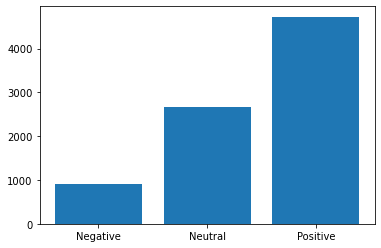

In [18]:
labels = df.groupby('Score').count().index.values

values = df.groupby('Score').size().values

plt.bar(labels, values)

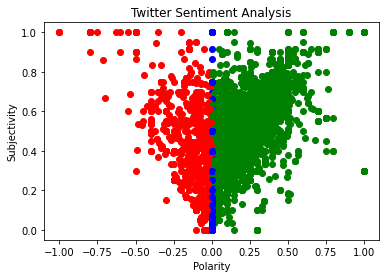

In [19]:
for index, row in df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
# add legend
plt.show()

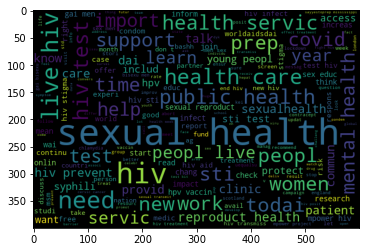

In [20]:

words = ' '.join([tweet for tweet in df['preprocessed_tweet_to_string']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()

### sentiment analysis on tweet text

In [21]:
tweet_text_df=pd.read_csv("/Users/arvind.pawar/Downloads/Roche_microinfluencer_tweets_topicmodeling.csv")

In [22]:
tweet_text_df.head(2)

,Unnamed: 0,level_0,index,tweet_id,user_id,tweet_text,tweet_text_display,tweet_created_at,lang,retweet_count,...,tweet_created_at_formatted,tweet,preprocessed_tweet,preprocessed_tweet_to_string,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,top_topic
0,0,0,3,8.319500e+16,320869019.0,PAP: Prevalence and Determinants of High-risk ...,PAP: Prevalence and Determinants of High-risk ...,6/21/11 15:29,NaN,NaN,...,6/21/11 15:29,PAP: Prevalence and Determinants of High-risk ...,"['pap', 'preval', 'determin', 'high', 'risk', ...",pap preval determin high risk human papillomav...,0,20,0.0804,"risk, infect, high, syphili, low, number, rece...","['pap', 'preval', 'determin', 'high', 'risk', ...",3
1,1,1,4,8.319560e+16,320869019.0,"Most Popular: ""Doctor, How Long Has My Chlamyd...","Most Popular: ""Doctor, How Long Has My Chlamyd...",6/21/11 15:32,NaN,NaN,...,6/21/11 15:32,"Most Popular: ""Doctor, How Long Has My Chlamyd...","['popular', 'doctor', 'long', 'chlamydia', 'an...",popular doctor long chlamydia answer horizont ...,1,12,0.0536,"nation, health, develop, make, treat, doctor, ...","['popular', 'doctor', 'long', 'chlamydia', 'an...",3


In [23]:
tweet_text_df['Subjectivity'] = tweet_text_df['tweet_text'].apply(getTextSubjectivity)
tweet_text_df['Polarity'] = tweet_text_df['tweet_text'].apply(getTextPolarity)

In [24]:
tweet_text_df['Score'] = tweet_text_df['Polarity'].apply(getTextAnalysis)

In [25]:
tweet_text_df.head()

,Unnamed: 0,level_0,index,tweet_id,user_id,tweet_text,tweet_text_display,tweet_created_at,lang,retweet_count,...,preprocessed_tweet_to_string,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,top_topic,Subjectivity,Polarity,Score
0,0,0,3,8.319500e+16,320869019.0,PAP: Prevalence and Determinants of High-risk ...,PAP: Prevalence and Determinants of High-risk ...,6/21/11 15:29,NaN,NaN,...,pap preval determin high risk human papillomav...,0,20,0.0804,"risk, infect, high, syphili, low, number, rece...","['pap', 'preval', 'determin', 'high', 'risk', ...",3,0.1,0.00,Neutral
1,1,1,4,8.319560e+16,320869019.0,"Most Popular: ""Doctor, How Long Has My Chlamyd...","Most Popular: ""Doctor, How Long Has My Chlamyd...",6/21/11 15:32,NaN,NaN,...,popular doctor long chlamydia answer horizont ...,1,12,0.0536,"nation, health, develop, make, treat, doctor, ...","['popular', 'doctor', 'long', 'chlamydia', 'an...",3,0.6,0.35,Positive
2,2,2,5,8.322430e+16,320869019.0,Table of Contents Chemoprophylaxis Is Likely t...,Table of Contents Chemoprophylaxis Is Likely t...,6/21/11 17:26,NaN,NaN,...,tabl content chemoprophylaxi like accept mitig...,2,7,0.0516,"woman, import, step, stori, gender, report, un...","['tabl', 'content', 'chemoprophylaxi', 'like',...",3,1.0,0.00,Neutral
3,3,3,10,8.464710e+16,320869019.0,PAP: Evaluation of the Polyclonal ELISA HPV Se...,PAP: Evaluation of the Polyclonal ELISA HPV Se...,6/25/11 15:40,NaN,NaN,...,pap evalu polyclon elisa hpv serolog assai bio...,3,0,0.0357,"test, order, free, home, kit, save, lockdown, ...","['pap', 'evalu', 'polyclon', 'elisa', 'hpv', '...",3,0.1,0.00,Neutral
4,4,4,13,8.646190e+16,320869019.0,PAP: Women Underestimate the Age of Their Part...,PAP: Women Underestimate the Age of Their Part...,6/30/11 15:51,NaN,NaN,...,pap women underestim ag partner survei intervi...,4,7,0.0526,"woman, import, step, stori, gender, report, un...","['pap', 'women', 'underestim', 'ag', 'partner'...",3,0.0,0.00,Neutral


In [26]:
positive = tweet_text_df[tweet_text_df['Score'] == 'Positive']
negative = tweet_text_df[tweet_text_df['Score'] == 'Negative']
neutral = tweet_text_df[tweet_text_df['Score'] == 'Neutral']

pos=round((positive.shape[0]/(tweet_text_df.shape[0])*100),2)

neg=round((negative.shape[0]/(tweet_text_df.shape[0])*100),2)

neu=round((neutral.shape[0]/(tweet_text_df.shape[0])*100),2)


print(str(pos) + " % of positive tweets")
print(str(neg) + " % of negative tweets")
print(str(neu) + " % of neutral tweets")

70.48 % of positive tweets
9.49 % of negative tweets
20.03 % of neutral tweets
